# Data Analysis Interview Challenge

## Part-1 Exploratory Data Analysis

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [34]:
data = pd.read_json('/Users/adamyanayyar/Desktop/SpringBoard/Projects/ultimate_challenge/logins.json')
data.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [35]:
df = pd.DataFrame(data=data, index=data.login_time, columns=['count'])
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [36]:
data = df.resample('15min').sum()
data.index.rename('Datetime',inplace=True)
data.head()

,count
Datetime,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


### Datetime Features

In [37]:
data['Datetime'] = pd.to_datetime(data.index,format='%d-%m-%Y %H:%M')
data.head()

,count,Datetime
Datetime,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00


In [38]:
data['month']=data['Datetime'].dt.month 
data['day']=data['Datetime'].dt.day

data['dayofweek_num']=data['Datetime'].dt.dayofweek  
data['hour'] = data['Datetime'].dt.hour 
#data['quarter'] = data['Datetime'].dt.quarter we only have 1st quarter
data['is_month_start'] = data['Datetime'].dt.is_month_start 
data['is_month_end'] = data['Datetime'].dt.is_month_end

data.head()

,count,Datetime,month,day,dayofweek_num,hour,is_month_start,is_month_end
Datetime,,,,,,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,1,1,3,20,True,False
1970-01-01 20:15:00,6,1970-01-01 20:15:00,1,1,3,20,True,False
1970-01-01 20:30:00,9,1970-01-01 20:30:00,1,1,3,20,True,False
1970-01-01 20:45:00,7,1970-01-01 20:45:00,1,1,3,20,True,False
1970-01-01 21:00:00,1,1970-01-01 21:00:00,1,1,3,21,True,False


In [40]:
data["is_month_start"] = data["is_month_start"].astype(int)
data["is_month_end"] = data["is_month_end"].astype(int)

In [42]:
data.drop('Datetime',axis=1,inplace=True)
data.sample(3)

,count,month,day,dayofweek_num,hour,is_month_start,is_month_end
Datetime,,,,,,,
1970-03-15 13:45:00,17,3,15,6,13,0,0
1970-02-16 06:15:00,0,2,16,0,6,0,0
1970-01-11 09:15:00,1,1,11,6,9,0,0


## Data Visualization

**Count vs Day of Week**

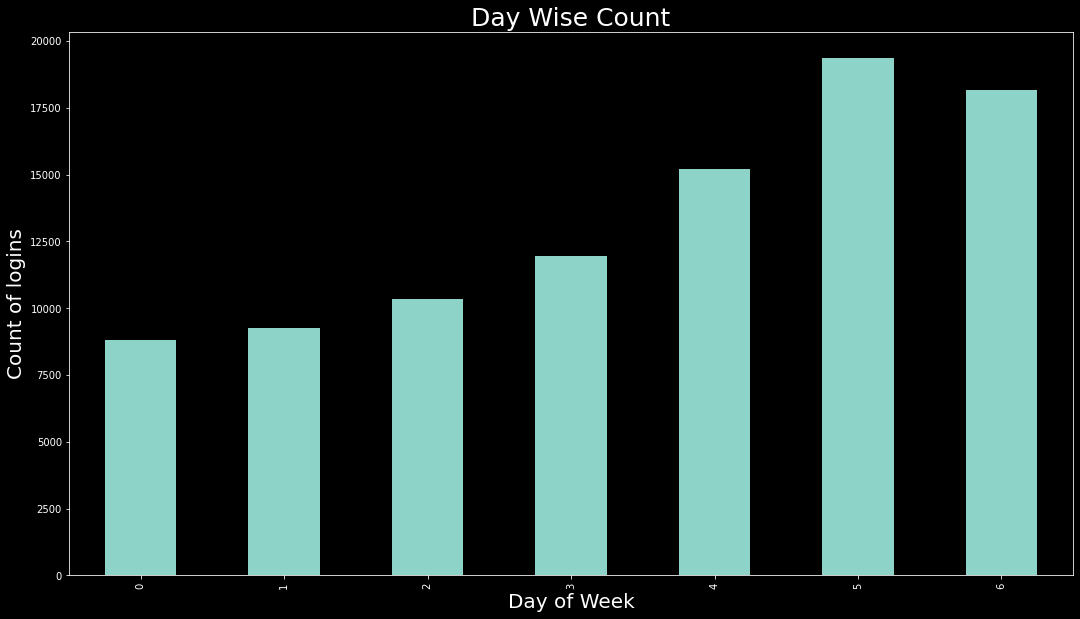

In [67]:
plt.figure(figsize=(18,10))
data.groupby(['dayofweek_num'])['count'].agg('sum').plot(kind='bar')
plt.xlabel("Day of Week",fontsize = 20)
plt.ylabel("Count of logins",fontsize = 20)
plt.title("Day Wise Count",fontsize = 25)
plt.show()

We can see that logins count is minimum during the start of the week and increases significantly as we approaches the weekend. This maybe due to high demand of travellers as they might be travelling more on weekends as compared to normal workdays.
Also some drivers might be working somewhere else during weekdays and driving only on weekends.

**Count Vs Month**

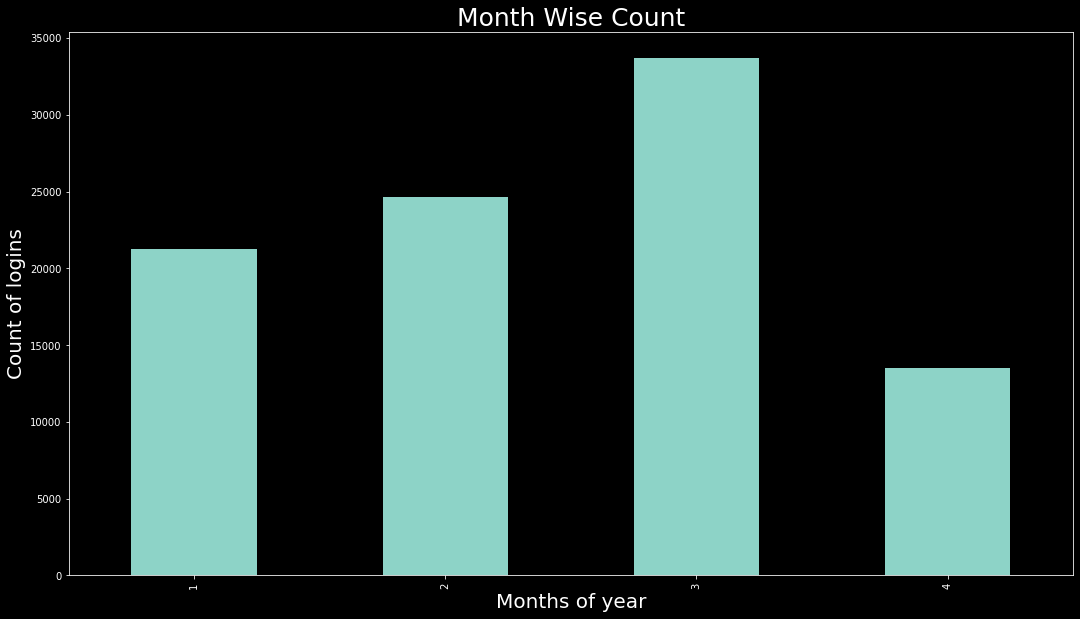

In [70]:
plt.figure(figsize=(18,10))
data.groupby(['month'])['count'].agg('sum').plot(kind='bar')
plt.xlabel("Months of year",fontsize = 20)
plt.ylabel("Count of logins",fontsize = 20)
plt.title("Month Wise Count",fontsize = 25)
plt.show()  # we have only data till 13th of the 4th month'''

In [72]:
data.groupby(['month'])['count'].agg('sum')

month
1    21239
2    24673
3    33723
4    13507
Name: count, dtype: int64

We can see the number of login counts is increasing with the months. 
For 4th month, we have counts for 13 days which is 13507, at this rate for 30 days it will be around 31,170 or probably more.

**Count Vs Hour**

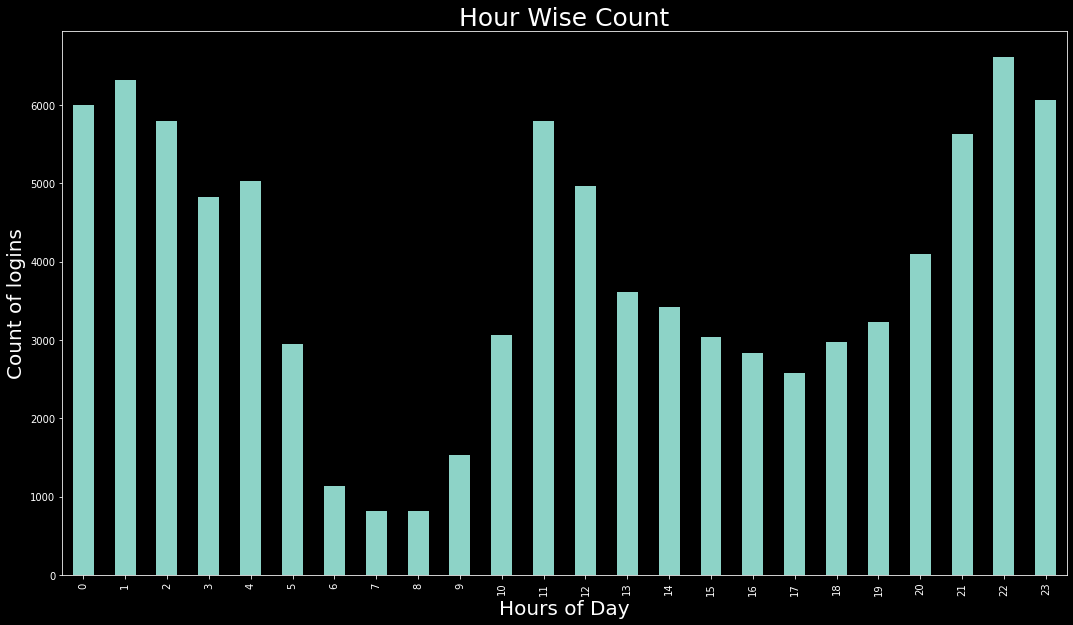

In [65]:
plt.figure(figsize=(18,10))
data.groupby(['hour'])['count'].agg('sum').plot(kind='bar')
plt.xlabel("Hours of Day",fontsize = 20)
plt.ylabel("Count of logins",fontsize = 20)
plt.title("Hour Wise Count",fontsize = 25)
plt.show()

We can see a clear trend, the login is huge during midnight and decreases significantly after 4am, and is lowest between 6 to 9am in the morning. Then the login count increase quickly till 11 am and then again a cool off during the afternoon hours. Again increases after 6pm and is highest around 11pm.

**Day vs Count**

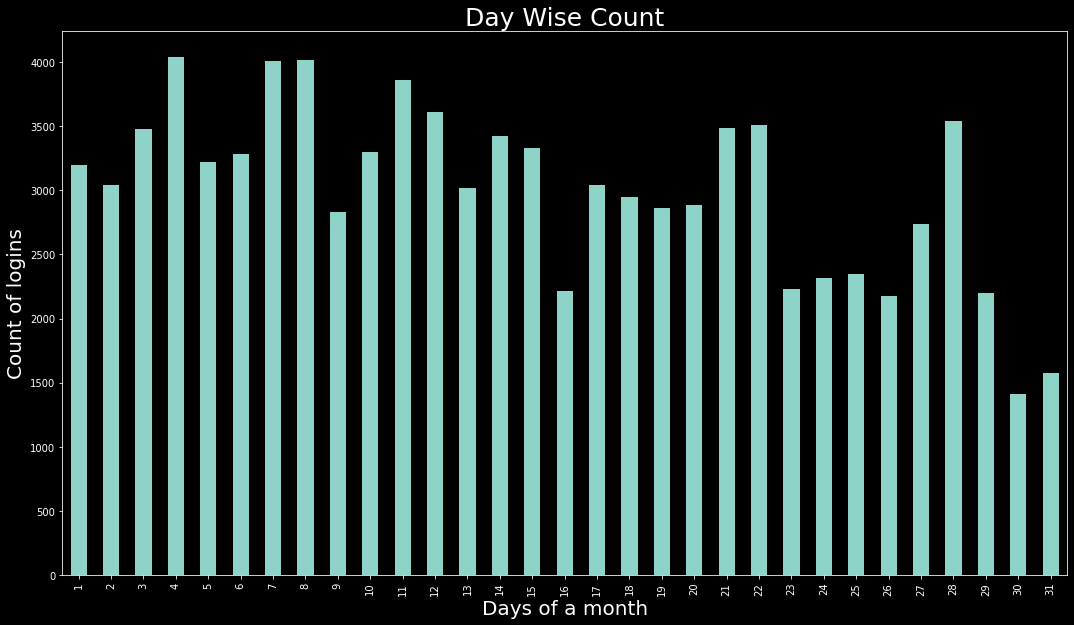

In [66]:
plt.figure(figsize=(18,10))
data.groupby(['day'])['count'].agg('sum').plot(kind='bar')
plt.xlabel("Days of a month",fontsize = 20)
plt.ylabel("Count of logins",fontsize = 20)
plt.title("Day Wise Count",fontsize = 25)
plt.show()

The counts after 13th is slighly less due to lack of data.
Also there are some patterns which maybe not be completely visible.
We can see spikes on 7th, 14th, 21st, 28th which indicates there might be some lag correlations. We can resample data day wise and make lag features.

**Month start vs Count**

In [78]:
m_start = data.groupby(['is_month_start'])['count'].agg('sum')
m_end = data.groupby(['is_month_end'])['count'].agg('sum')

print(m_start,m_end)

is_month_start
0    89948
1     3194
Name: count, dtype: int64 is_month_end
0    90172
1     2970
Name: count, dtype: int64


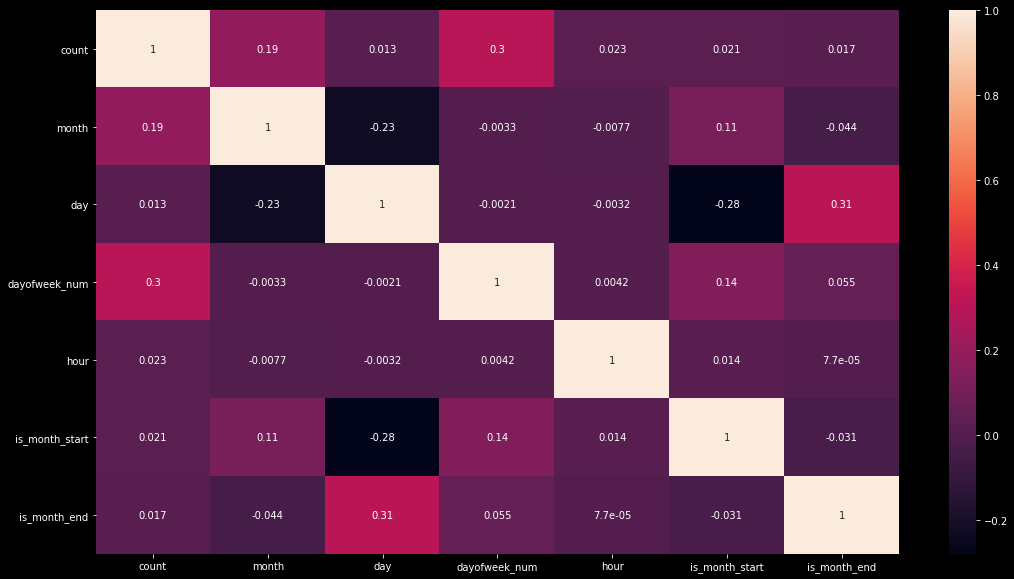

In [79]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot=True)

Let's resample the data day wise and make a new dataframe to check new lag and rolling window features.

In [81]:
sample = df.resample('1D').sum()
sample.index.rename('Datetime',inplace=True)
sample.head()

,count
Datetime,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


### Lag Features

If the series has a weekly trend, which means the value last Monday can be used to predict the value for this Monday, you should create lag features for seven days. Getting the drift?

We can create multiple lag features as well! Let’s say we want lag 1 to lag 7 – we can let the model decide which is the most valuable one. So, if we train a linear regression model, it will assign appropriate weights (or coefficients) to the lag features

In [90]:
sample['lag_1'] = sample['count'].shift(1)
sample['lag_2'] = sample['count'].shift(2)
sample['lag_3'] = sample['count'].shift(3)
sample['lag_4'] = sample['count'].shift(4)
sample['lag_5'] = sample['count'].shift(5)
sample['lag_6'] = sample['count'].shift(6)
sample['lag_7'] = sample['count'].shift(7)

### Rolling window feature

How about calculating some statistical values based on past values? This method is called the rolling window method because the window would be different for every data point.

In [91]:
sample['rolling_mean'] = sample['count'].rolling(window=7).mean()

### Expanding Window Feature

This is simply an advanced version of the rolling window technique. In the case of a rolling window, the size of the window is constant while the window slides as we move forward in time. Hence, we consider only the most recent values and ignore the past values.

In [92]:
sample['expanding_mean'] = sample['count'].expanding(2).mean()

In [93]:
sample.dropna(inplace=True)
sample.head()

,count,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,expanding_mean
Datetime,,,,,,,,,,
1970-01-08,625,648.0,536.0,459.0,788.0,793.0,681.0,112.0,647.142857,580.250000
1970-01-09,881,625.0,648.0,536.0,459.0,788.0,793.0,681.0,675.714286,613.666667
1970-01-10,1054,881.0,625.0,648.0,536.0,459.0,788.0,793.0,713.000000,657.700000
1970-01-11,1014,1054.0,881.0,625.0,648.0,536.0,459.0,788.0,745.285714,690.090909
1970-01-12,536,1014.0,1054.0,881.0,625.0,648.0,536.0,459.0,756.285714,677.250000


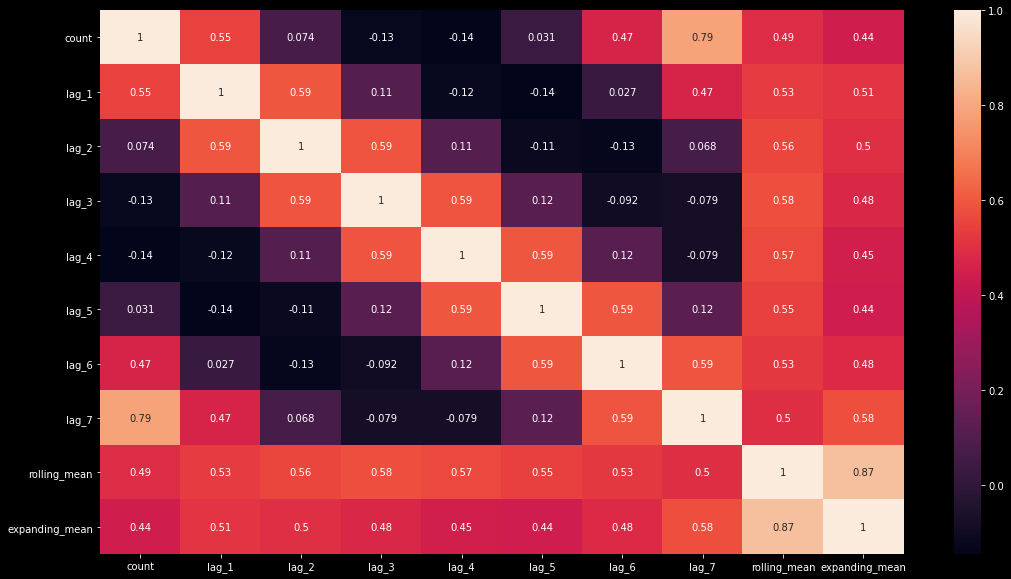

In [94]:
plt.figure(figsize=(18,10))
sns.heatmap(sample.corr(),annot=True)

This proves our intuition that there is some similarity in login counts at lag 7 (same day previous week).

**Import Features of Demand**

1) dayofweek_num : This feature shows that demand is more during the weekends.

2) Hour : This shows that the login count is high during midnight, decreases to minimum during early mornings, rises sharply till 12pm, slight dip during the afternoon hours and increases significantly after 6pm and reaches highest logins around 11pm.

3) lag_7 : This proves that the logins have correlation with the previous 7 days login count.

4) Month : We can also see a huge spike in month but this can't be proved as we don't have data for all the months.

**Data Quality Issue:** 

1) The data set is too small, we could collect more.

2) The data provided should have covered the entire 4th month atleast, so we could have more accurate visualizations. 

3) We can't link this data with the user. If the login time could be linked with user id, we could have more insights to make better decisions

## Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

**Key measure of success** - More weekday rides on average per user.
We should use this metric to measure the performance of our decision to reimburse toll costs.
As the traffic shows complementary nature, we can remove the toll price barrier which will allow the drivers to move freely from one city to another without paying taxes, as a result a driver can drive at Metropolis during day when the demand is high and can drive at Gotham during night during high demand. This should further increase the average rides per user.

**Practical Experiment** 

To perform this experiment we should do A/B testing.

**General idea** - We can initially make this offer available randomly to 20% of all the drivers in both cities. The selection should be random. For these 20% drivers the toll will be reimbursed. We can run the pilot for 2 months so we have enough data points. With this data we can check the new average weekday rides per user. After this we will do significance testing to check if this experiment lead to a significant increase in average rides or it is due to chance. 

**Example:** Suppose the average weekday hours for our entire pool of drivers is around 200 weekday rides per user in 2 months. If the weekday average rides of these 20% drivers came around 210 rides per users, we will do the significance testing and see if this 5% increase in rides is random or due to our experiment. Similarly if the average rides per user reaches 250, hence 20% increase in rides, this looks significantly more but we will check this again by A/B testing.

**Result:** If there is significant increase in the number of average rides, we can reimburse the toll tax during weekdays, as this will result in better demand supply of drivers in both cities during the weekdays.

**Note:** We also have to check weather the significant increase in rides is increasing our profits after subtracting the toll refunds.

## Part 3 ‐ Predictive modeling

### Data Loading

In [389]:
data = pd.read_json('/Users/adamyanayyar/Desktop/SpringBoard/Projects/ultimate_challenge/ultimate_data_challenge.json')


In [390]:
data.sample(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
41137,King's Landing,2,2014-01-20,5.0,1.00,2014-06-24,Android,0.0,True,80.0,4.21,5.0
40430,Astapor,0,2014-01-26,5.0,1.00,2014-06-15,iPhone,0.0,True,60.0,6.45,4.6
4598,King's Landing,10,2014-01-10,4.7,1.18,2014-06-28,iPhone,25.0,True,65.0,5.89,4.5
43530,Winterfell,3,2014-01-07,5.0,1.00,2014-05-16,Android,0.0,True,100.0,4.59,5.0
39170,King's Landing,1,2014-01-11,4.0,1.39,2014-06-09,iPhone,42.9,True,71.4,6.40,5.0


### Data description

● **city**: city this user signed up in

● **phone**: primary device for this user

● **signup_date**: date of account registration; in the form ‘YYYYMMDD’

● **last_trip_date**: the last time this user completed a trip; in the form ‘YYYYMMDD’

● **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup

● **avg_rating_by_driver**: the rider’s average rating over all of their trips

● **avg_rating_of_driver**: the rider’s average rating of their drivers over all of their trips

● **surge_pct**: the percent of trips taken with surge multiplier > 1

● **avg_surge**: The average surge multiplier over all of this user’s trips

● **trips_in_first_30_days**: the number of trips this user took in the first 30 days after
signing up

● **ultimate_black_user**: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● **weekday_pct**: the percent of the user’s trips occurring during a weekday

 A user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
 Let's create a feature retain and assign it 1 for retained and 0 for not retained.

In [391]:
data.last_trip_date.max(), data.last_trip_date.min()

('2014-07-01', '2014-01-01')

In [392]:
data.signup_date.max(), data.signup_date.min()

('2014-01-31', '2014-01-01')

All the drivers signed up in January and the last trip date is July 1st, we will consider those drivers retained who took atleast one trip in the month of June. Not retained who didn't take any trip in June.

In [393]:
data['last_date'] = data.last_trip_date.max()

In [394]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['last_date'] = pd.to_datetime(data['last_date'])
data['days_since_last_trip'] = (data.last_date - data.last_trip_date).dt.days
data.head(3)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_date,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.1,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01,14
1,Astapor,0,2014-01-29,5.0,1.0,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01,57
2,Astapor,3,2014-01-06,4.3,1.0,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01,175


In [395]:
count = 0
retain = 0
data['retention'] = 1
for i,x in enumerate(data.days_since_last_trip):
    if x > 30:
        count=count+1
        data['retention'].loc[i] = 0
    else:
        retain = retain + 1
print('Drivers retained: ', retain)
print('Drivers not retained: ', count)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Drivers retained:  18804
Drivers not retained:  31196


In [456]:
print('Users retained', (data['retention'] == 1).sum()/ len(data))

Users retained 0.37602387198846454


In [396]:
data.sample(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,last_date,days_since_last_trip,retention
16557,Winterfell,4,2014-01-11,5.0,1.06,2014-01-13,iPhone,25.0,False,0.0,2.00,4.8,2014-07-01,169,0
22760,Winterfell,1,2014-01-24,3.0,1.00,2014-06-02,iPhone,0.0,False,71.4,2.24,4.7,2014-07-01,29,1
28189,King's Landing,1,2014-01-16,NaN,1.00,2014-06-25,Android,0.0,True,100.0,7.29,5.0,2014-07-01,6,1
41673,Winterfell,0,2014-01-04,NaN,1.00,2014-03-02,iPhone,0.0,True,0.0,0.73,4.0,2014-07-01,121,0
7062,King's Landing,5,2014-01-05,5.0,1.17,2014-06-22,iPhone,33.3,True,22.2,1.86,4.6,2014-07-01,9,1


We now have a target feature 'retention' which we will try to predict in our model.

### Feature Engineering and Data Cleaning

In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  object        
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  last_date               50000 non-null  dateti

We can replace the null values in average rating of driver and by driver with mean. For phone we can replace the nulls with mode.

In [398]:
data.avg_rating_of_driver.fillna(data.avg_rating_of_driver.mean(),inplace=True)
data.avg_rating_by_driver.fillna(data.avg_rating_by_driver.mean(),inplace=True)
data.phone.fillna(data.phone.mode().iloc[0],inplace=True)

In [399]:
data.drop(['signup_date','last_trip_date','last_date','days_since_last_trip'],axis=1,inplace=True)

In [400]:
data.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [401]:
data.phone.unique()

array(['iPhone', 'Android'], dtype=object)

In [402]:
data.ultimate_black_user.unique()

array([ True, False])

We can make dummy variables for the above features. Also we can downcast our data to decrease memory usage.

In [403]:
def downcast(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    df[float_cols] = df[float_cols].astype(np.float32)
    int_cols = [c for c in df if df[c].dtype == "int64"]
    df[int_cols] = df[int_cols].astype(np.int32)
    return df

data = downcast(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int32  
 2   avg_rating_of_driver    50000 non-null  float32
 3   avg_surge               50000 non-null  float32
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float32
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float32
 8   avg_dist                50000 non-null  float32
 9   avg_rating_by_driver    50000 non-null  float32
 10  retention               50000 non-null  int32  
dtypes: bool(1), float32(6), int32(2), object(2)
memory usage: 2.3+ MB
None


In [404]:
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)  # 1 for True, 0 false

In [406]:
data = pd.get_dummies(data)
data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retention,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.200001,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.000000,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.000000,0.77,5.0,0,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.000000,2.36,4.9,1,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.400002,3.13,4.9,0,0,0,1,1,0


### Remove Outliers

In [407]:
Q1 = data.quantile(0.01)
Q3 = data.quantile(0.99)  #Remove only the most extreme values
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49933 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  49933 non-null  int32  
 1   avg_rating_of_driver    49933 non-null  float32
 2   avg_surge               49933 non-null  float32
 3   surge_pct               49933 non-null  float32
 4   ultimate_black_user     49933 non-null  int64  
 5   weekday_pct             49933 non-null  float32
 6   avg_dist                49933 non-null  float32
 7   avg_rating_by_driver    49933 non-null  float32
 8   retention               49933 non-null  int32  
 9   city_Astapor            49933 non-null  uint8  
 10  city_King's Landing     49933 non-null  uint8  
 11  city_Winterfell         49933 non-null  uint8  
 12  phone_Android           49933 non-null  uint8  
 13  phone_iPhone            49933 non-null  uint8  
dtypes: float32(6), int32(2), int64(1), uin

### Correlation with Retention

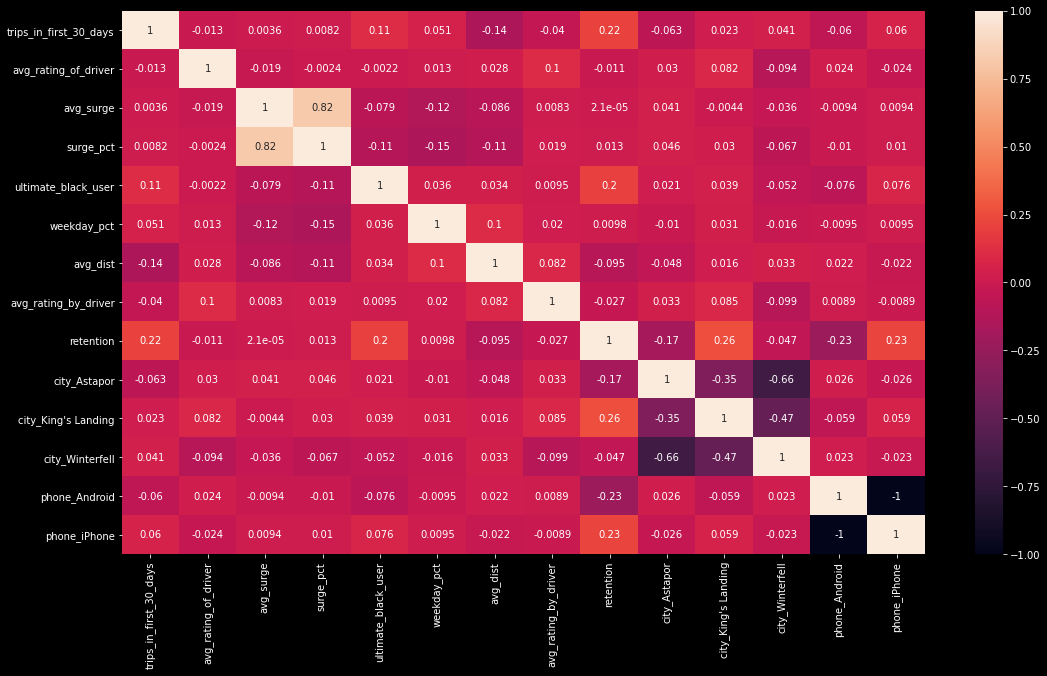

In [409]:
plt.figure(figsize=(18,10))
corr_ = data.corr()
sns.heatmap(corr_,annot=True)

In [410]:
pd.DataFrame(corr_["retention"].sort_values(ascending=False)).head(8)

,retention
retention,1.000000
city_King's Landing,0.262334
phone_iPhone,0.225527
trips_in_first_30_days,0.217067
ultimate_black_user,0.204622
surge_pct,0.012854
weekday_pct,0.009774
avg_surge,0.000021


King's Landing city, Iphone users, trips in first 30 days and ultimate black users features are positively correlated to retention. We will check this in more detail.

In [411]:
pd.DataFrame(corr_["retention"].sort_values(ascending=True)).head(8)

,retention
phone_Android,-0.225527
city_Astapor,-0.174437
avg_dist,-0.095412
city_Winterfell,-0.046885
avg_rating_by_driver,-0.026790
avg_rating_of_driver,-0.011136
avg_surge,0.000021
weekday_pct,0.009774




## Modeling

In [469]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

data_valid = data.iloc[-5000:]
data = data[:-5000]
valid_X = data_valid.drop(['retention'],axis=1)
valid_y = data_valid.retention

y = data.retention
X = data.drop(['retention'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=22)



### Logistic Regression

In [466]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

score = accuracy_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)

print('Logistic Regression Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

cv_pred = cross_val_predict(lr, X, y, n_jobs=-1, cv=10)
cv_accuracy = accuracy_score(y,cv_pred)
cvfpr, cvtpr, thresholds = roc_curve(y, cv_pred)

print('Cross-Predicted(KFold) Accuracy Score: ', cv_accuracy)
print('Area under curve',auc(cvfpr, cvtpr))
#REsidual Plots

Logistic Regression Accuracy Score:  0.7169149868536372
Area under curve 0.6737448710277001


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Cross-Predicted(KFold) Accuracy Score:  0.7152730824130419
Area under curve 0.671102551087154


### Ridge Classifier

In [467]:
rr = RidgeClassifier()
rr_fit = rr.fit(X_train, y_train)
pred = rr_fit.predict(X_test)

score = accuracy_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)

print('Logistic Regression Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

cv_pred = cross_val_predict(rr, X, y, n_jobs=-1, cv=10)
cv_accuracy = accuracy_score(y,cv_pred)
cvfpr, cvtpr, thresholds = roc_curve(y, cv_pred)

print('CV Accuracy Score: ', cv_accuracy)
print('CV Area under curve',auc(cvfpr, cvtpr))

Logistic Regression Accuracy Score:  0.7191686490547139
Area under curve 0.6722926727106714
CV Accuracy Score:  0.7158740890992412
CV Area under curve 0.6676682880838932


### Random Forest Classifier

In [468]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

score = accuracy_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)

print('Random Forest Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

cv_pred = cross_val_predict(rf, X, y, n_jobs=-1, cv=10)
cv_accuracy = accuracy_score(y,cv_pred)
cvfpr, cvtpr, thresholds = roc_curve(y, cv_pred)

print('CV Accuracy Score: ', cv_accuracy)
print('CV Area under curve',auc(cvfpr, cvtpr))

Random Forest Accuracy Score:  0.7538500062601727
Area under curve 0.7335010444319796
CV Accuracy Score:  0.7545388525780683
CV Area under curve 0.7355839823021503


Accuracy and AUC score is much better by Random Forest as compared to other models.

### Randomized Search CV on Random Forest

In [416]:
rfr = RandomForestClassifier()
n_estimators = [int(x) for x in np.linspace(start = 30 , stop = 300, num = 10)]
max_features = [4,6,8,10,12]
max_depth = [int(x) for x in np.linspace(2, 6, num = 2)] 
max_depth.append(None)
bootstrap = [True, False]
r_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'bootstrap': bootstrap}
cv_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 10,
                                cv = 5, verbose=2, random_state=42,
                                n_jobs=-1, return_train_score=True)

cv_random.fit(X_train, y_train);

print(cv_random.best_params_)

pred = cv_random.predict(X_test)
score = accuracy_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)

print('Random Forest Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.9min finished


{'n_estimators': 120, 'max_features': 4, 'max_depth': 6, 'bootstrap': False}
Random Forest Accuracy Score:  0.7824171422849705
Area under curve 0.7547826423632636


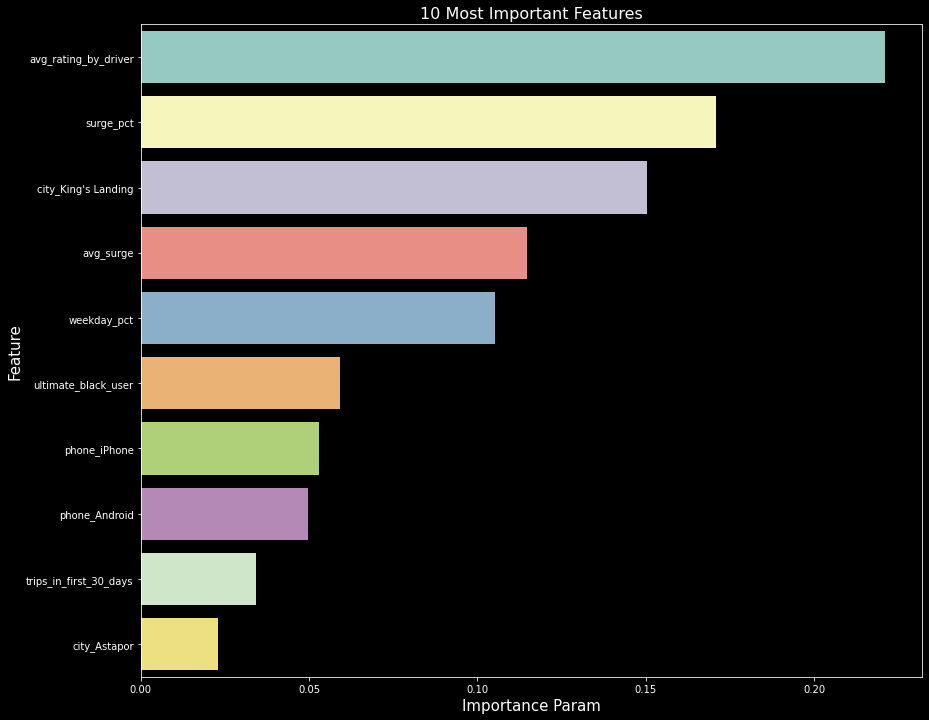

In [417]:
feature_imp = [col for col in zip(X_train.columns, cv_random.best_estimator_.feature_importances_)]
feature_imp.sort(key=lambda x:x[1], reverse=True)
imp = pd.DataFrame(feature_imp[0:10], columns=['feature', 'importance'])
plt.figure(figsize=(14, 12))
sns.barplot(y='feature', x='importance', data=imp)
plt.title('10 Most Important Features', fontsize=16)
plt.ylabel("Feature", fontsize=15)
plt.xlabel("Importance Param",fontsize=15)
plt.show()

Above features are the important one's according to Random Forest.

### Ada Boost Classifier

In [473]:
abc = AdaBoostClassifier()
n_estimators = [int(x) for x in np.linspace(start = 20 , stop = 300, num = 5)]
learning_rate = [0.1,1,10]
r_grid = {'n_estimators': n_estimators,
               'learning_rate':learning_rate}
cv_ada = RandomizedSearchCV(estimator=abc, param_distributions=r_grid, n_iter = 10,
                                cv = 5, verbose=2, random_state=42,scoring='roc_auc',
                                n_jobs=-1, return_train_score=True)

cv_ada.fit(X_train, y_train);

print(cv_ada.best_params_)

pred1 = cv_ada.predict(X_test)
score = accuracy_score(y_test,pred1)
fpr, tpr, thresholds = roc_curve(y_test, pred1)

print('Ada Boost Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


{'n_estimators': 300, 'learning_rate': 1}
Ada Boost Accuracy Score:  0.7861743237440961
Area under curve 0.7607774859742336


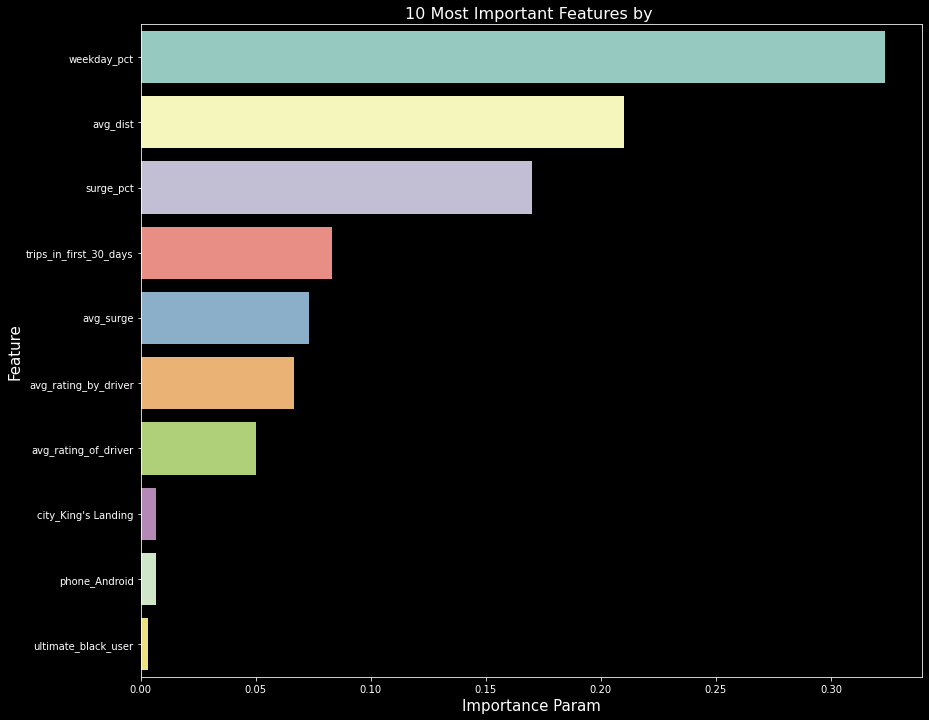

In [474]:
feature_imp = [col for col in zip(X_train.columns, cv_ada.best_estimator_.feature_importances_)]
feature_imp.sort(key=lambda x:x[1], reverse=True)
imp = pd.DataFrame(feature_imp[0:10], columns=['feature', 'importance'])
plt.figure(figsize=(14, 12))
sns.barplot(y='feature', x='importance', data=imp)
plt.title('10 Most Important Features by ', fontsize=16)
plt.ylabel("Feature", fontsize=15)
plt.xlabel("Importance Param",fontsize=15)
plt.show()

This model shows that weekday_pct is the most important feature followed by avg_dist, surge_pct, and others.

### Gradient Boosting Classifier

In [282]:
abc = GradientBoostingClassifier()
n_estimators = [int(x) for x in np.linspace(start = 20 , stop = 300, num = 5)]
learning_rate = [0.01,0.1,1,10]
loss = ['deviance', 'exponential']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(2, 6, num = 2)] 
max_depth.append(None)
r_grid = {'n_estimators': n_estimators,
          'loss' : loss,
          'max_features' : max_features,
          'max_depth' : max_depth,
          'learning_rate':learning_rate,
         }
cv_grad = RandomizedSearchCV(estimator=abc, param_distributions=r_grid, n_iter = 10,
                                cv = 5, verbose=2, random_state=42,scoring='roc_auc',
                                n_jobs=-1, return_train_score=True)

cv_grad.fit(X_train, y_train);

print(cv_grad.best_params_)

pred = cv_random.predict(X_test)
score = accuracy_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)

print('Gradient Boost Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.3min finished


{'n_estimators': 20, 'max_features': 'auto', 'max_depth': 6, 'loss': 'deviance', 'learning_rate': 0.01}
Ada Boost Accuracy Score:  0.6254
Area under curve 0.5


### Bagging Classifier

In [462]:
bc = BaggingClassifier()
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 5)]
max_features = [4,6,8,10,12,14]
max_samples = [int(x) for x in np.linspace(1, 12, num = 4)] 
r_grid = {'n_estimators': n_estimators,
          'max_features' : max_features,
          'max_samples' : max_samples,
         }
cv_bag = RandomizedSearchCV(estimator=bc, param_distributions=r_grid, n_iter = 10,
                                cv = 5, random_state=42,scoring='roc_auc',
                                n_jobs=-1, return_train_score=True)

cv_bag.fit(X_train, y_train);

print(cv_bag.best_params_)

pred = cv_random.predict(X_test)
score = accuracy_score(y_test,pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)

print('Bagging Classifier Accuracy Score: ', score)
print('Area under curve',auc(fpr, tpr))

{'n_estimators': 77, 'max_samples': 8, 'max_features': 10}
Bagging Classifier Accuracy Score:  0.6675678381896465
Area under curve 0.5769650217010879


AdaBoost and RandomForest performed much better than Gradient Boost and Bagging Classifier

### Let's check Random Forests, Ada Boost's on validation set

In [476]:
pred_r = cv_random.predict(valid_X)
score = accuracy_score(valid_y, pred_r)
print('Random Forest Accuracy Score on Valid dataset: ', score)

pred_a = cv_ada.predict(valid_X)
score = accuracy_score(valid_y, pred_a)
print('Ada Boost Accuracy Score on Valid dataset: ', score)


Random Forest Accuracy Score on Valid dataset:  0.7936
Ada Boost Accuracy Score on Valid dataset:  0.7884


**Both Models performed equally well on Validation dataset, hence we can check the important features of both these models and make suggestions.**

Overall both models have show an accuracy around 79%, hence we can predict new users retention rate correctly 80% of the times.

We selected these models because they have high accuracy over other models. 
Their area under curve is better than other models and we can rely on this model for 79% correct predictions.

## Data Visualization (Important features vs Target)

### Ada Boost Imp Features

Text(0.5, 1.0, 'Retention vs Weekday driving percentage')

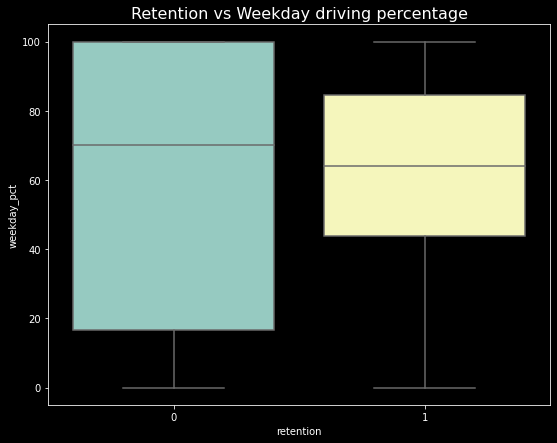

In [484]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='weekday_pct', data=data)
plt.title('Retention vs Weekday driving percentage', fontsize=16)

From above graph we can say that drivers who tend to drive 50-80% on weekdays are more likely to retain, than the drivers who drive 20-30% on weekdays and more on weekends.

**Recomendation: On average the users who drive less on weekdays are more prone to churn. Therefore the users should be influenced to drive more on weekdays.**

Text(0.5, 1.0, 'Retention vs Average distance per ride')

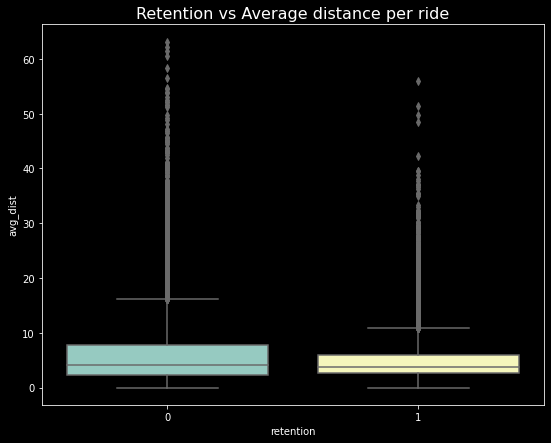

In [482]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='avg_dist', data=data)
plt.title('Retention vs Average distance per ride', fontsize=16)

**Recomendation: The users who take smaller trips are more likely to retain as compared to the users who take longer trips. Therefore, Initially we can show the new users more small distance trips and once they are retained, we can show them all trips.**

Text(0.5, 1.0, 'Retention vs Trips taken with surge multiplier')

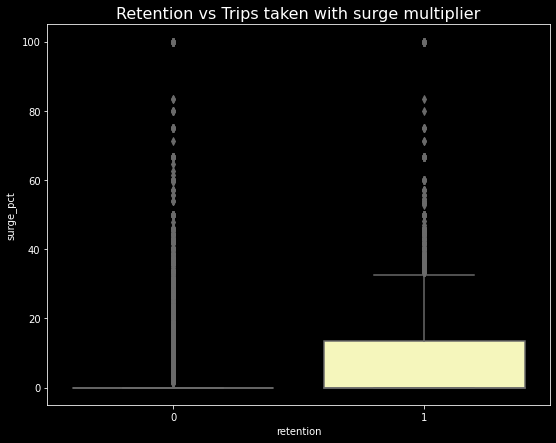

In [480]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='surge_pct', data=data)
plt.title('Retention vs Trips taken with surge multiplier', fontsize=16)

**Recomendation: The more trips taken with surge multiplier, the more users are more likely to retain. Therefore, we can add more surged multipliers for the new users and once they are retained, we can decrease the surge back to normal.**

Text(0.5, 1.0, 'Retention vs Trips taken in first 30 days of signup')

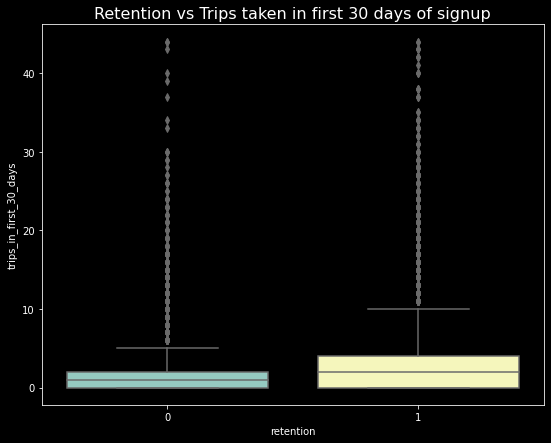

In [478]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='trips_in_first_30_days', data=data)
plt.title('Retention vs Trips taken in first 30 days of signup', fontsize=16)

**Recomendation: We should motivate the user to take more trips during the first 30 days after signup, as the users taking more trips during the first month itself are more likely to retain.**

Text(0.5, 1.0, 'Retention vs Average surge over all trips of a user')

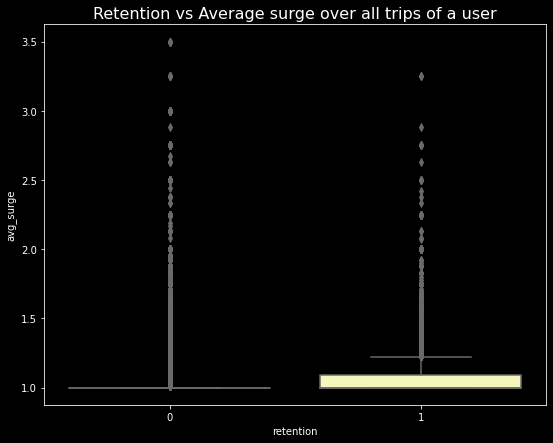

In [486]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='avg_surge', data=data)
plt.title('Retention vs Average surge over all trips of a user', fontsize=16)

**Recommendation: On average we can show new users more surged trips and once they are retained, we can change the dynamic back to normal.**

Text(0.5, 1.0, 'Retention vs Average rating by driver')

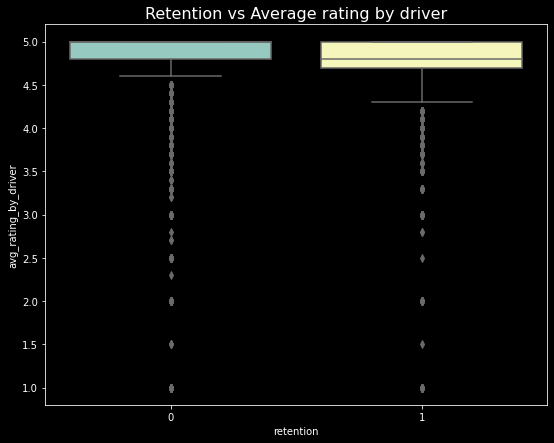

In [442]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='avg_rating_by_driver', data=data)
plt.title('Retention vs Average rating by driver', fontsize=16)

Text(0.5, 1.0, 'Retention vs Average rating of driver')

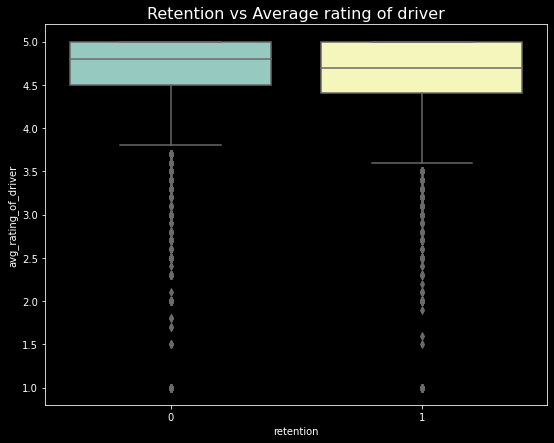

In [447]:
plt.figure(figsize=(9, 7))
sns.boxplot(x='retention', y='avg_rating_of_driver', data=data)
plt.title('Retention vs Average rating of driver', fontsize=16)

**Avg_rating_of_driver and avg_rating_by_driver** doesn't look like the best indicators to predict retention.

### Random Forest Important Features

Only those features which we didn't capture above in Ada Boost. These are mostly binary features, rest were covered by Ada boost.

Text(0.5, 1.0, "Retention vs city King's Landing")

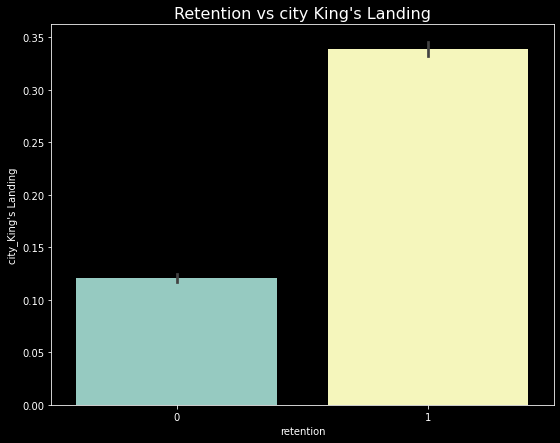

In [419]:
plt.figure(figsize=(9, 7))
sns.barplot(x='retention', y="city_King's Landing", data=data)
plt.title("Retention vs city King's Landing", fontsize=16)

**Recomendation: User's in King's landing are more likely to retain as compared to users in other cities. Therefore we can reimburse the toll charges between cities and give users more access to make trips in Kings Landing. We can also try to hire more users from Kings Landing which can increase the overall retention.**

Text(0.5, 1.0, 'Retention vs city Astapor')

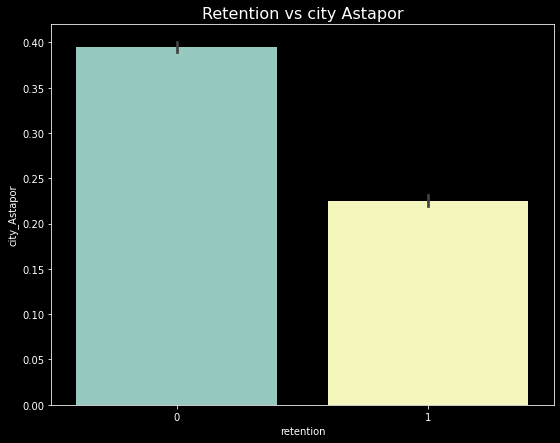

In [425]:
plt.figure(figsize=(9, 7))
sns.barplot(x='retention', y="city_Astapor", data=data)
plt.title("Retention vs city Astapor", fontsize=16)

**Recomendation: User's in Astapor are less likely to retain as compared to users in other cities. Therefore we can reimburse the toll charges between cities and give users more access to make trips in Kings Landing and Winterfell.

Text(0.5, 1.0, 'Retention vs city Winterfell')

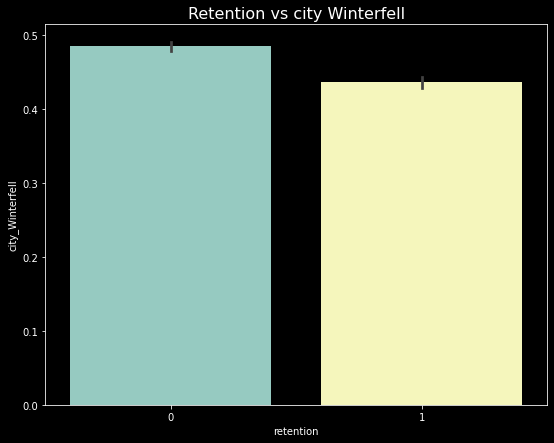

In [426]:
plt.figure(figsize=(9, 7))
sns.barplot(x='retention', y="city_Winterfell", data=data)
plt.title("Retention vs city Winterfell", fontsize=16)

Almost Equal retention and churn, which suggests this is not an important feature.

Text(0.5, 1.0, 'Retention vs Ultimate black user or not')

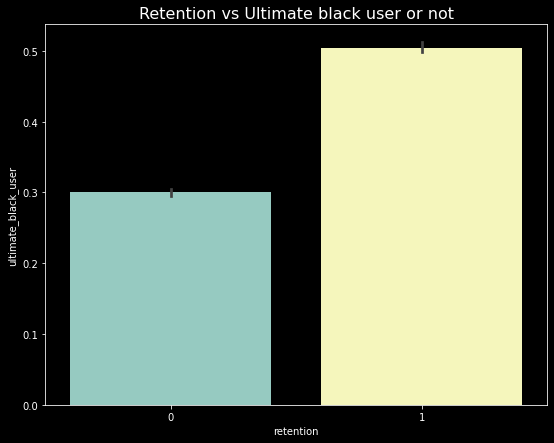

In [427]:
plt.figure(figsize=(9, 7))
sns.barplot(x='retention', y="ultimate_black_user", data=data)
plt.title("Retention vs Ultimate black user or not", fontsize=16)

**Recommendation: The ultimate black users are more likely to retain, so we should adopt strategies to make users Ultimate black users. Overall retention will increase.**

Text(0.5, 1.0, 'Retention on Iphone')

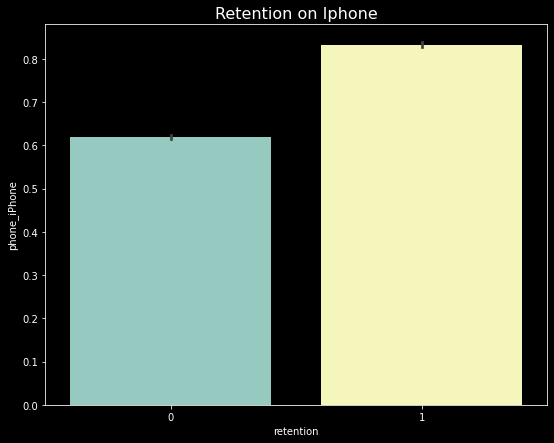

In [429]:
plt.figure(figsize=(9, 7))
sns.barplot(x='retention', y="phone_iPhone", data=data)
plt.title("Retention on Iphone", fontsize=16)

Text(0.5, 1.0, 'Retention on Android')

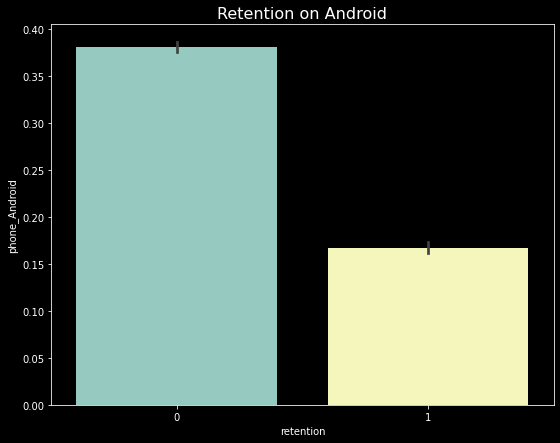

In [430]:
plt.figure(figsize=(9, 7))
sns.barplot(x='retention', y="phone_Android", data=data)
plt.title("Retention on Android", fontsize=16)

**Recommendation: Retention on Iphone is great. We will have to check what are the differences between the app on Iphone and android. The user experience might be better on Iphone, or the android app might be facing some issues or might be tedious to work on. We should make the required changes in Android app to increase the retention.**

I have provided the recommendations below each feature which Ultimate can leverage to improve it's long term rider retention.